Importação das bibliotecas necessárias

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.io.wavfile import read, write
from scipy.signal import butter, filtfilt, freqs, dlti, dimpulse
from numpy.fft import fft, fftfreq
from IPython.display import Audio as play

warnings.filterwarnings("ignore")

Análise dos áudios

In [63]:
play("./data/01.wav")

In [64]:
play("./data/02.wav")

#### 1. Ler o arquivo .wav para obter o sinal x[n] em forma de vetor.

In [65]:
# Obtaining x[n] in vector form from 01.wav file.
sample_rate, data = read("./data/01.wav")
N = len(data)
T = 1/sample_rate
print(f"Número de amostras: {sample_rate}\nTamanho do sinal: {N}")

t = np.arange(0, N/sample_rate, T)
print(f"Vetor tempo: {t}")

# Converting x[n] -> x[jw]
f = fftfreq(N,T)
transf = np.abs(fft(data))

Número de amostras: 44100
Tamanho do sinal: 622173
Vetor tempo: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.41081633e+01
 1.41081859e+01 1.41082086e+01]


In [66]:
# Obtaining x[n] in vector form from 02.wav file.
sample_rate_2, data_2 = read("./data/02.wav")
N_2 = len(data_2)
T_2 = 1/sample_rate_2
print(f"Número de amostras: {sample_rate_2}\nTamanho do sinal: {N_2}")

t_2 = np.arange(0, N_2/sample_rate_2, T_2)
print(f"Vetor tempo: {t_2}")

# Converting x[n] -> x[jw]
f_2 = fftfreq(N_2,T_2)
transf_2 = np.abs(fft(data_2))

Número de amostras: 22050
Tamanho do sinal: 300449
Vetor tempo: [0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.36256689e+01
 1.36257143e+01 1.36257596e+01]


#### 2. Plotar o gráfico de x[n] no tempo e de seu espectro de frequência.

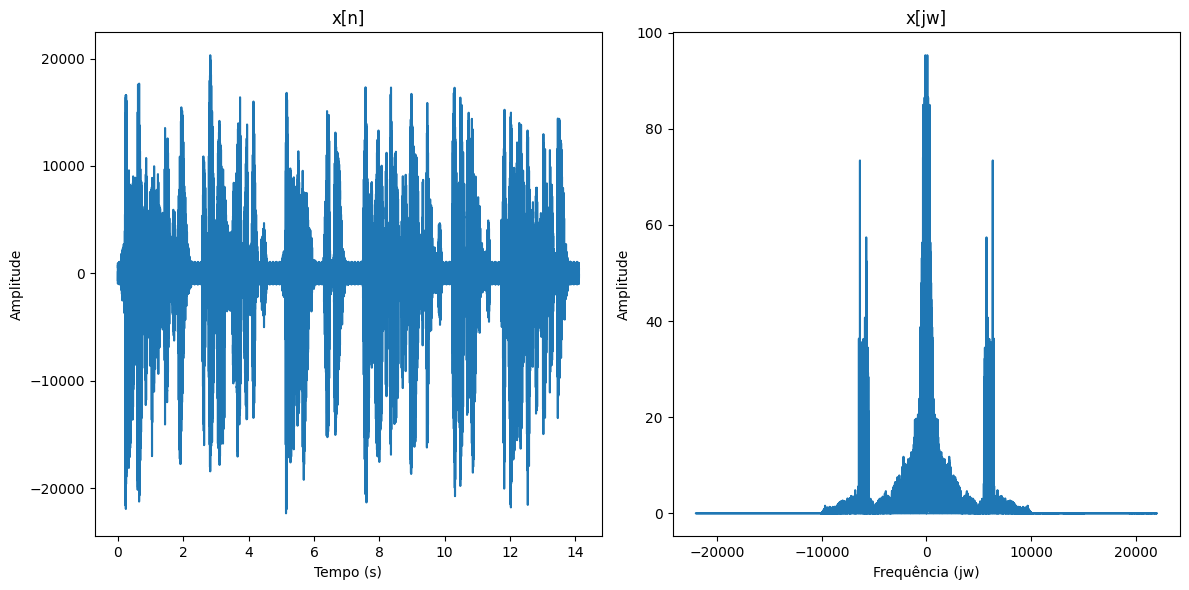

In [68]:
# Plotting graph of signal on time.
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(t, data)
ax[0].set_title("x[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")

ax[1].plot(f, transf/N)
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")

fig.tight_layout()
plt.savefig("./images/01_wav.png")
plt.show()

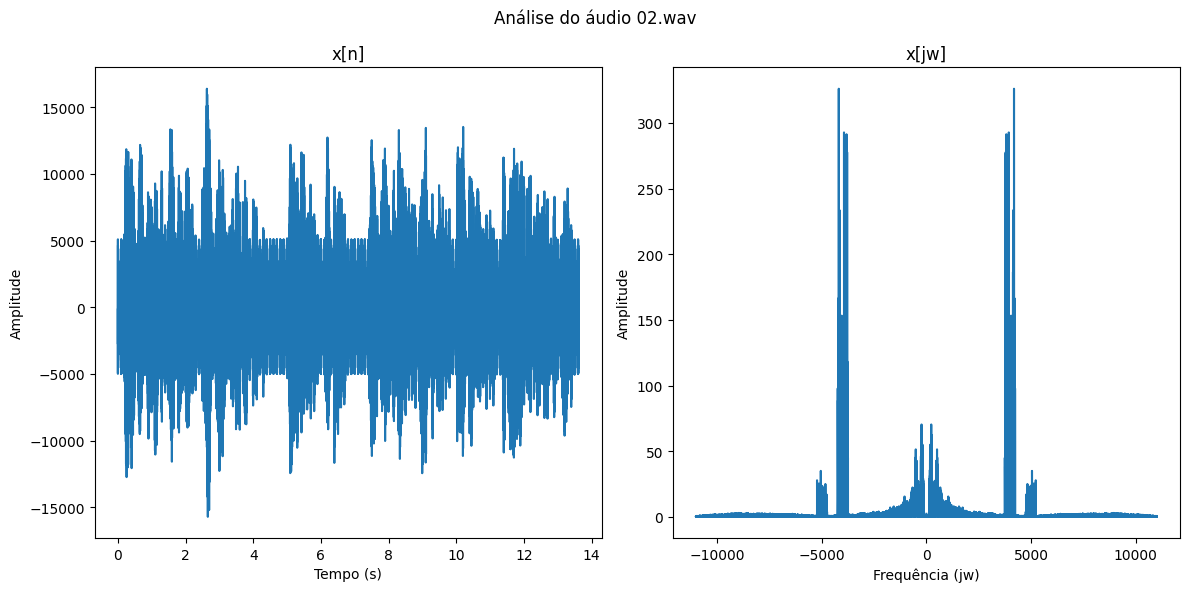

In [69]:
# Plotting graph of signal on time.
fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Análise do áudio 02.wav")
fig
ax[0].plot(t_2, data_2)
ax[0].set_title("x[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")

ax[1].plot(f_2, transf_2/N_2)
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")

fig.tight_layout()
plt.savefig("./images/02_wav.png")
plt.show()

#### 3. Implementar o filtro h[n] com os parâmetros ωc e L, tendo como base a fundamentação teórica indicada.

In [70]:
# 3. Filtro h[n]
def low_pass_filter(wc, l, sample_rate):
    # Design low-pass filter
    nyq = 0.5 * sample_rate # Applying Nyquist Theorem
    normal_wc = wc/nyq
    b, a = butter(l, normal_wc, btype="lowpass")
    return b, a

#### 4. Plotar o gráfico de h[n] no tempo, a magnitude e a fase de sua resposta em frequência.
- Discorra sobre as diferenças observadas entre a descrição teórica e a implementação prática do filtro.

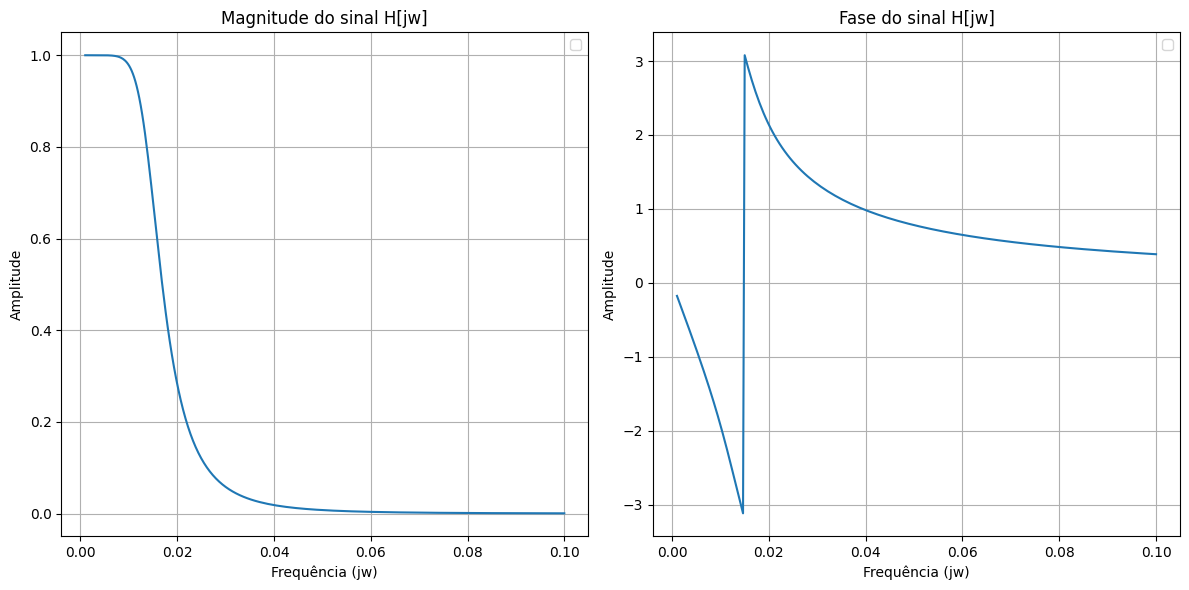

In [71]:
# Usando o wc normalizado com o frequência de amostras do áudio 1
b, a = butter(4, 1300/sample_rate*0.5, btype='lowpass', analog=True)
w, h = freqs(b, a)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(w, abs(h))
ax[0].set_title("Magnitude do sinal H[jw]")
ax[0].set_xlabel("Frequência (jw)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(w, np.angle(h))
ax[1].set_title("Fase do sinal H[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()
plt.savefig("./images/mag_fase_filter.png")
plt.show()

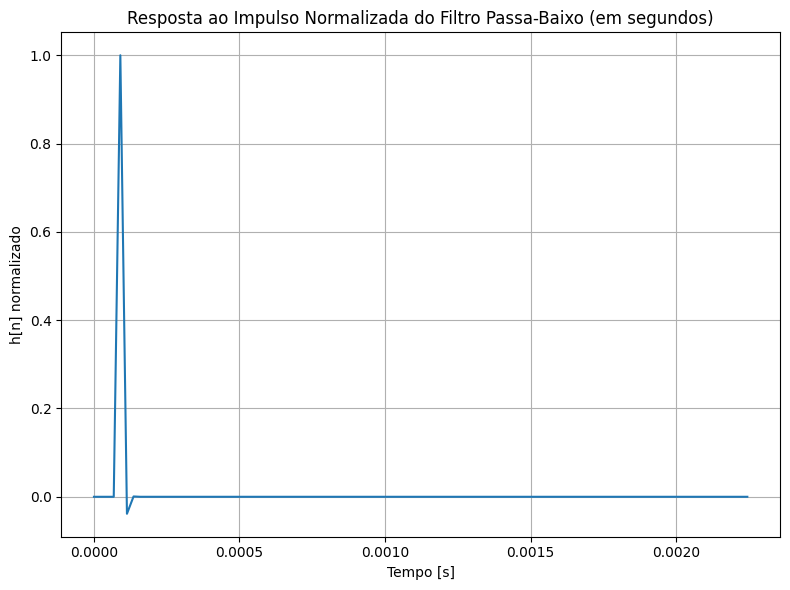

In [61]:
# Criando o sistema
system = dlti(b, a)

# Calculando a resposta ao impulso
t, h = dimpulse(system)
t_sec = t / sample_rate
h = np.squeeze(h)

# Normalizando pelo valor máximo de h[n]
h_normalized = h / np.max(np.abs(h))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t_sec, h_normalized)
ax.set_title("Resposta ao Impulso Normalizada do Filtro Passa-Baixo (em segundos)")
ax.set_xlabel("Tempo [s]")
ax.set_ylabel("h[n] normalizado")
ax.grid(True)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Salvando o plot como um arquivo PNG
fig.savefig("images\h[n]_tempo.png", format="png")


#### 5. Aplicar o filtro projetado e analisar o impacto da qualidade da filtragem ao variar os parâmetros L e ωc.
- Comente os resultados para alguns valores de sua escolha e indique qual o melhor valor obtido.

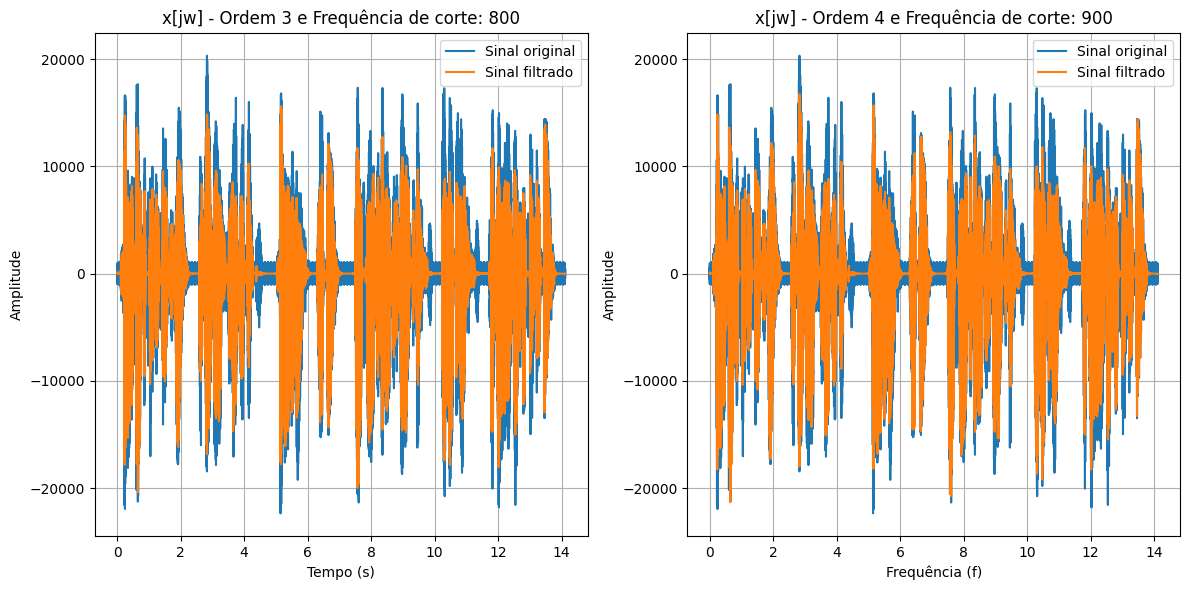

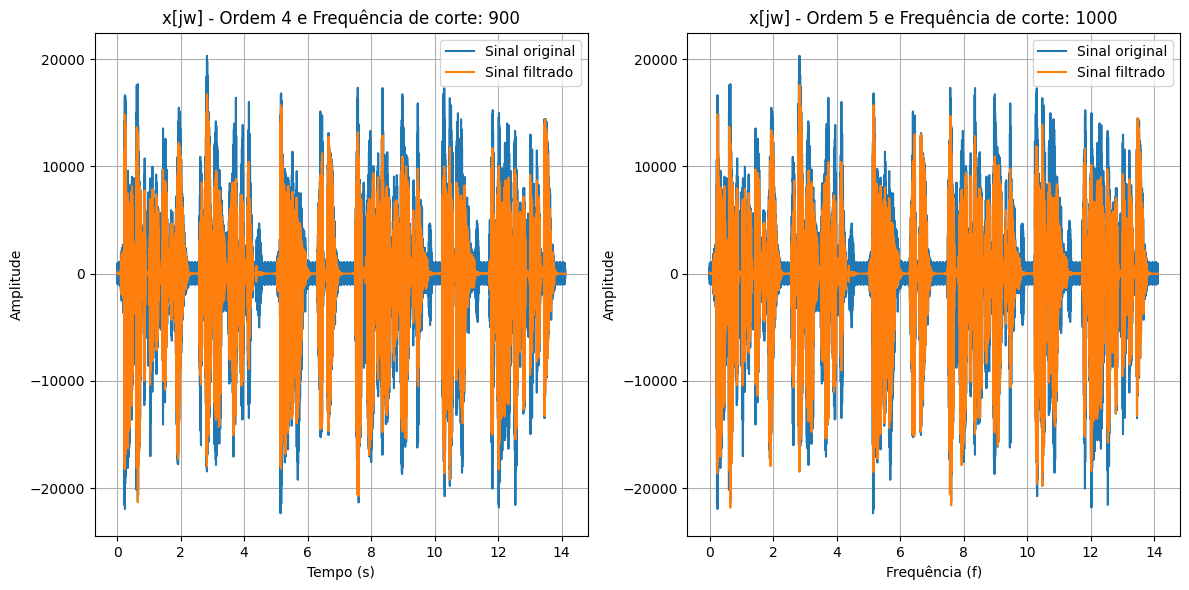

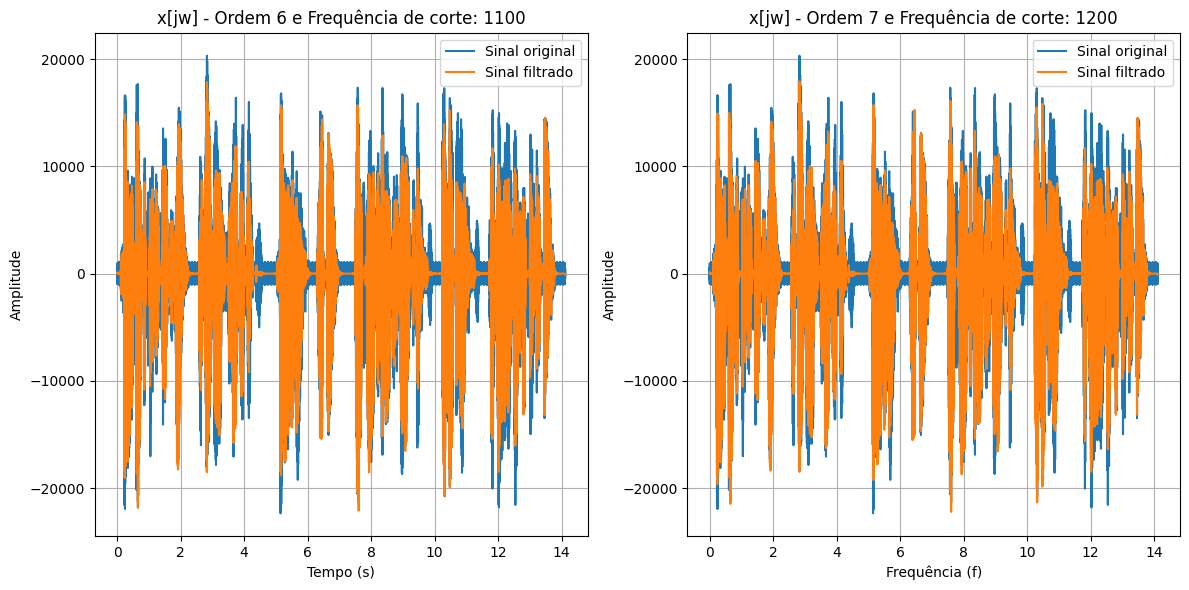

In [77]:
wcs = [800, 900, 1000, 1100, 1200, 1300]
ls = np.arange(3, 9, 1)
i=0
step=1

while i < len(ls)-1:

    b, a = low_pass_filter(wc=wcs[i], l=ls[i], sample_rate=sample_rate)
    b_2, a_2 = low_pass_filter(wc=wcs[i+1], l=ls[i+1], sample_rate=sample_rate)
    filtered_data = filtfilt(b, a, data)
    filtered_data_next = filtfilt(b_2, a_2, data)

    # Plot the original and filtered data
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].plot(t, data, label="Sinal original")
    ax[0].plot(t, filtered_data, label='Sinal filtrado')
    ax[0].set_title(f"x[jw] - Ordem {ls[i]} e Frequência de corte: {wcs[i]}")
    ax[0].set_xlabel("Tempo (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(t, data, label="Sinal original")
    ax[1].plot(t, filtered_data_next, label='Sinal filtrado')
    ax[1].set_title(f"x[jw] - Ordem {ls[i+1]} e Frequência de corte: {wcs[i+1]}")
    ax[1].set_xlabel("Frequência (f)")
    ax[1].set_ylabel("Amplitude")
    ax[1].legend()
    ax[1].grid(True)
    i += step
    step += 1

    fig.tight_layout()
    fig.savefig(f"./images/01_filtered_signal_{i}.png")
    plt.show()

write("./data/01_filtered.wav", sample_rate, filtered_data.astype(np.int16))

#### 6. Plotar o sinal filtrado no tempo e na frequência e comparar o antes e depois.

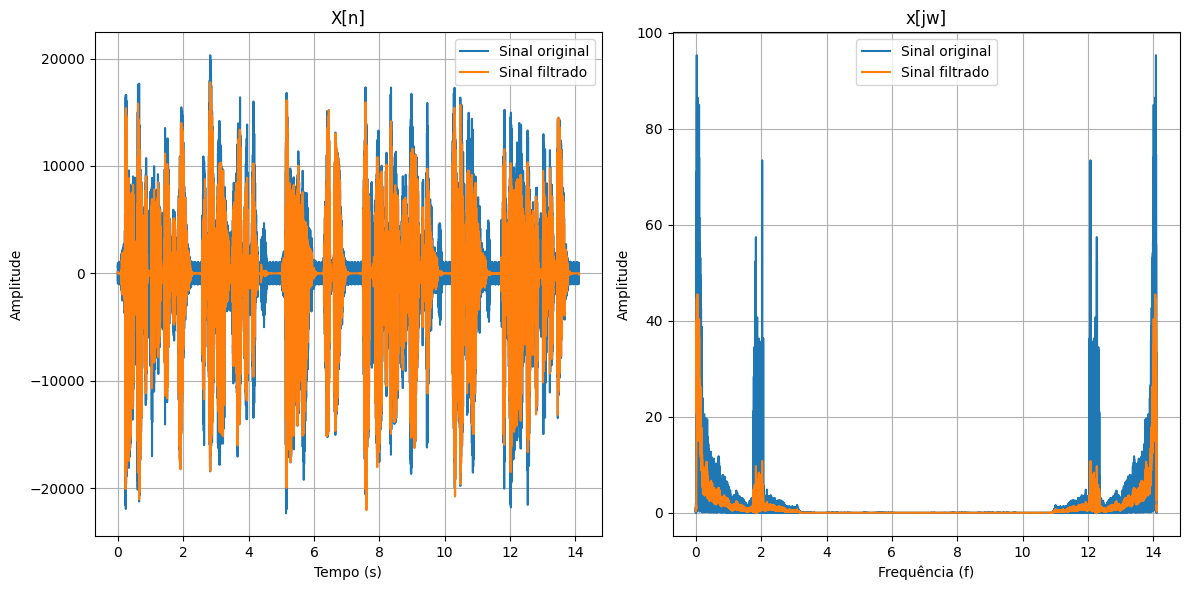

In [75]:
b, a = low_pass_filter(wc=1300, l=4, sample_rate=sample_rate)

filtered_data = filtfilt(b, a, data)
filtered_transf_data = filtfilt(b, a, transf)
write("./data/01_filtered.wav", sample_rate, filtered_data.astype(np.int16))

# Plot the original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.tight_layout()
ax[0].plot(t, data, label="Sinal original")
ax[0].plot(t, filtered_data, label='Sinal filtrado')
ax[0].set_title("X[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, transf/N, label="Sinal original")
ax[1].plot(t, filtered_transf_data/N, label='Sinal filtrado')
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (f)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()
fig.savefig("./images/01_filtered_signal.png")
plt.show()

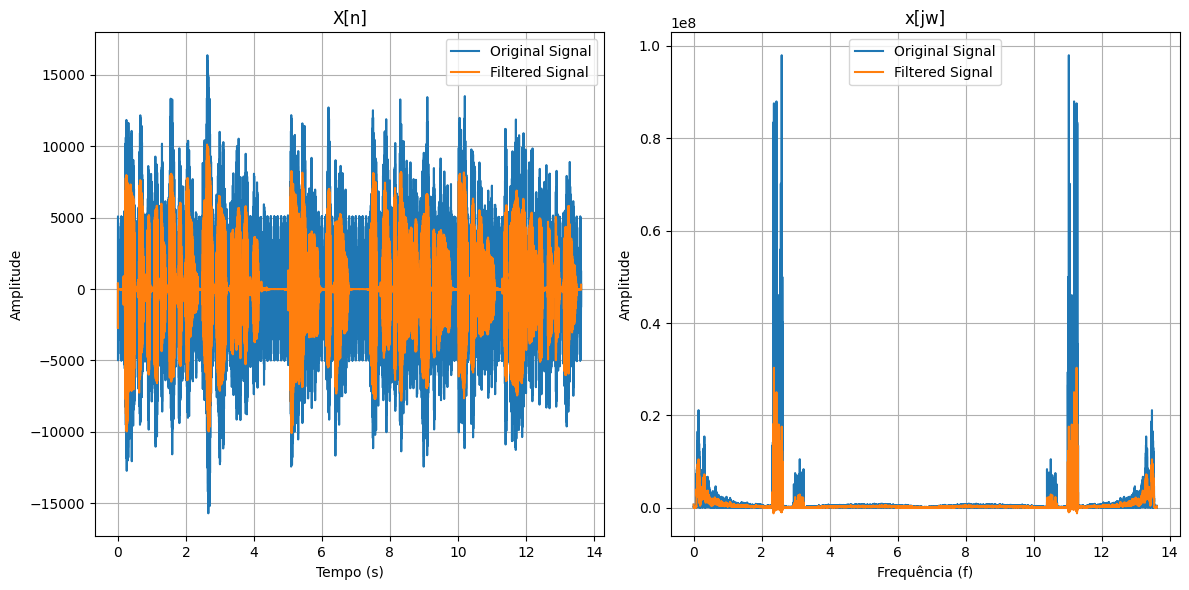

In [78]:
b_2, a_2 = low_pass_filter(wc=1300, l=4, sample_rate=sample_rate_2)

filtered_data_2 = filtfilt(b_2, a_2, data_2)
filtered_transf_data_2 = filtfilt(b_2, a_2, transf_2)
write("./data/02_filtered.wav", sample_rate_2, filtered_data_2.astype(np.int16))

# Plot the original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.tight_layout()
ax[0].plot(t_2, data_2, label="Original Signal")
ax[0].plot(t_2, filtered_data_2, label='Filtered Signal')
ax[0].set_title("X[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t_2, transf_2, label="Original Signal")
ax[1].plot(t_2, filtered_transf_data_2, label='Filtered Signal')
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (f)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()
fig.savefig("./images/02_filtered_signal.png")
plt.show()

#### 7. Mensurar de forma subjetiva a qualidade da filtragem ao escutar o áudio filtrado.

In [14]:
play("01_filtered.wav", rate=sample_rate)

In [53]:
play("02_filtered.wav", rate=sample_rate)